<a href="https://colab.research.google.com/github/yuri7718/YOLOv2-TensorFlow-Lite-on-iOS/blob/master/test_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 uninstall tensorflow
!pip3 install tf-nightly
try:
  %tensorflow_version 2.x
except:
  pass

Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 315.5MB 50kB/s 
     |████████████████████████████████| 460kB 47.0MB/s 
     |████████████████████████████████| 3.0MB 45.2MB/s 


In [ ]:
import numpy as np
import matplotlib.pylab as plt
import cv2

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from tqdm import tqdm

#!rm -r Food-Detection-by-YOLOv2-with-Transfer-Learning
#!git clone https://github.com/jianing-sun/Food-Detection-by-YOLOv2-with-Transfer-Learning.git
import os
from subprocess import getoutput
getoutput("git clone -l -s https://github.com/jianing-sun/Food-Detection-by-YOLOv2-with-Transfer-Learning.git cloned-repo")
os.chdir('cloned-repo/example')
from utils import decode_netout, draw_boxes

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/MODEL/'
%cd /content

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content


In [ ]:
# load model
model = root_path + "mnv2_224_tla_1007_gcp.tflite"
interpreter = tf.lite.Interpreter(model_path=model)
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()
output_index = interpreter.get_output_details()

In [ ]:
input_index

[{'dtype': numpy.float32,
  'index': 80,
  'name': 'input_3',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([  1, 224, 224,   3], dtype=int32),
  'shape_signature': array([  1, 224, 224,   3], dtype=int32),
  'sparsity_parameters': {}}]

In [ ]:
output_index

[{'dtype': numpy.float32,
  'index': 167,
  'name': 'output_node0',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([  1,   7,   7,   5, 105], dtype=int32),
  'shape_signature': array([  1,   7,   7,   5, 105], dtype=int32),
  'sparsity_parameters': {}}]

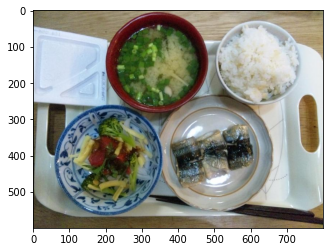

In [ ]:
# load testing image
img = root_path + "13840.jpg"
img = cv2.imread(img)
testing_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(testing_img)
plt.show()

In [ ]:
# preprocessing
img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_NEAREST)
img = np.float32(img / 255.0)
img = np.reshape(img, (1,224,224,3))

In [ ]:
interpreter.set_tensor(input_index[0]["index"], img)
interpreter.invoke()
results = interpreter.get_tensor(output_index[0]["index"])

In [ ]:
ANCHORS = [4.33, 3.64, 6.92, 6.26, 10.81, 7.48, 10.81, 4.86, 12.20, 9.29]
boxes = decode_netout(results[0], anchors=ANCHORS, nb_class=100, obj_threshold=0.3, nms_threshold=0.3)

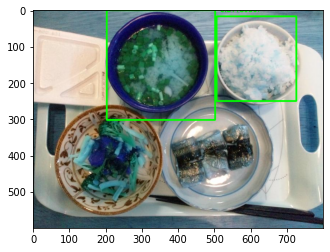

In [ ]:
out = draw_boxes(testing_img, boxes, labels=[""]*100)
plt.imshow(out[:,:,::-1])